In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from datetime import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [3]:
def ms_to_hours(milliseconds):
    hours = milliseconds / (1000 * 60 * 60)
    return hours

def ms_to_date(milliseconds):
    # Convert milliseconds to seconds
    seconds = milliseconds / 1000
    # Convert to datetime
    dt = datetime.fromtimestamp(seconds)
    return dt

In [4]:
#df = pd.read_csv('/content/drive/MyDrive/data/AAPL/AAPL_2024-09-16.csv')
df = pd.read_csv('data/AAPL/AAPL_2024-09-16.csv')

In [5]:

dfs = []

for

# Assuming the 'time' column is already in integer format, we can retrieve the first and last values:
first = df['time'].iloc[0]
last = df['time'].iloc[-1]


diff = last - first


print("First Time Value:", first)
print("Last Time Value:", last)
print("Time Difference:", diff)

print(str(ms_to_date(first)))
print(str(ms_to_date(last)))
print(str(ms_to_hours(diff)))

SyntaxError: invalid syntax (<ipython-input-5-3fd52c06bb47>, line 3)

In [6]:
n_jobs=-1


In [7]:
import glob
import os
csv_files = glob.glob(os.path.join('data/AAPL/', "*.csv"))

# Dictionary to store DataFrames for each file
dfs = {}

for file in csv_files:
    # Get the file name without the directory and extension
    file_name = os.path.basename(file).replace('.csv', '')
    
    # Read each CSV file into a DataFrame and store it in the dictionary
    dfs[file_name] = pd.read_csv(file)

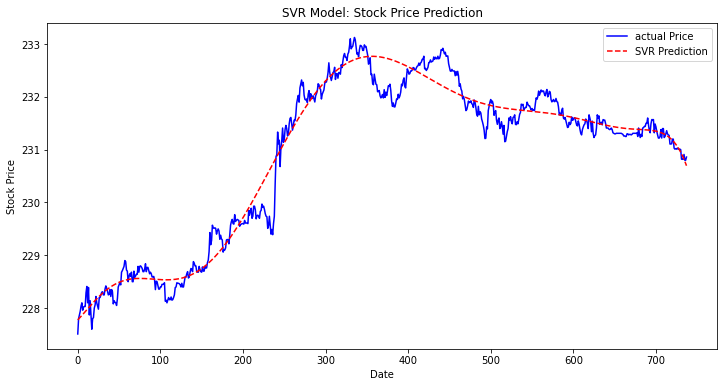

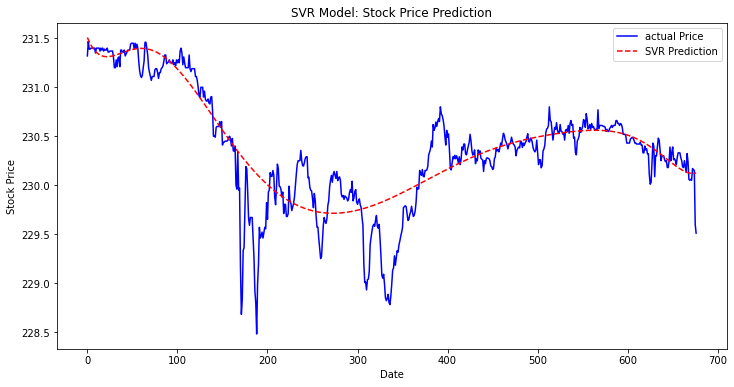

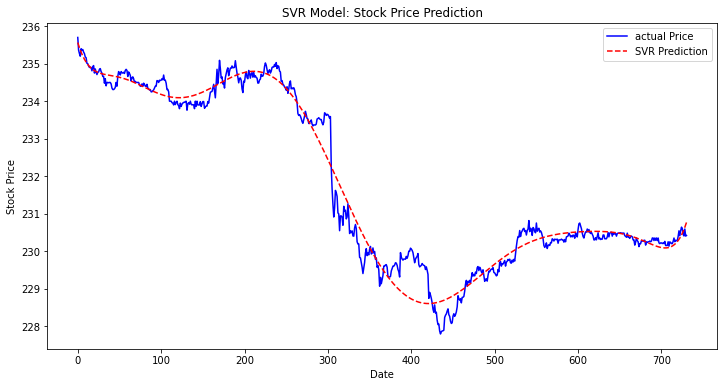

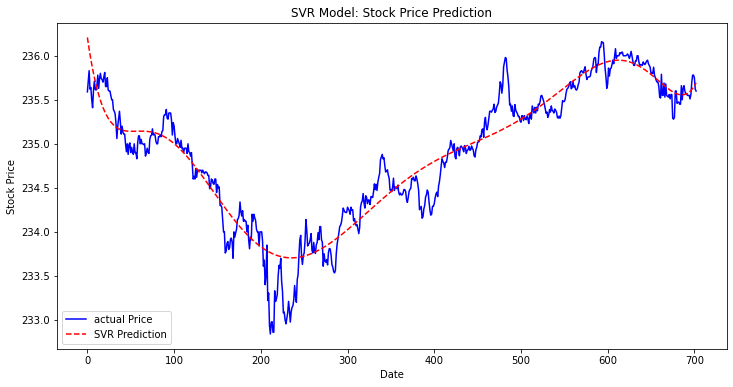

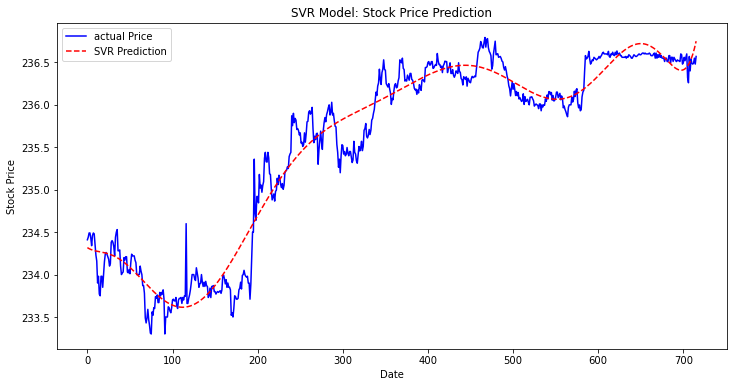

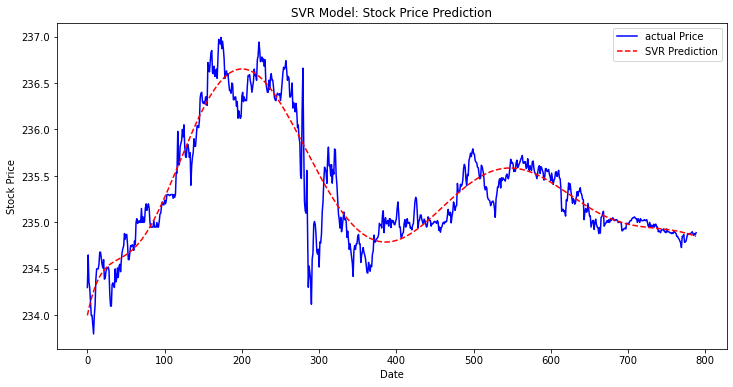

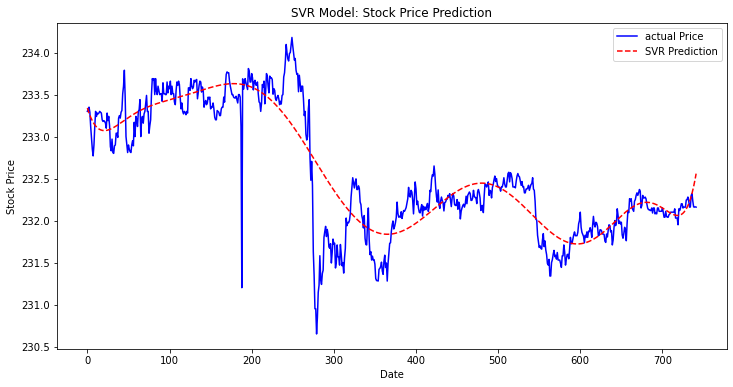

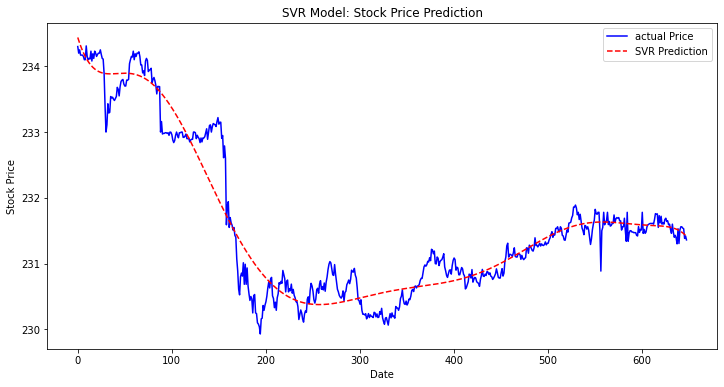

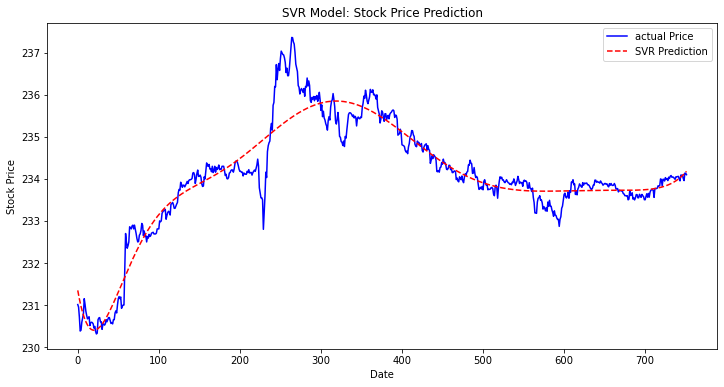

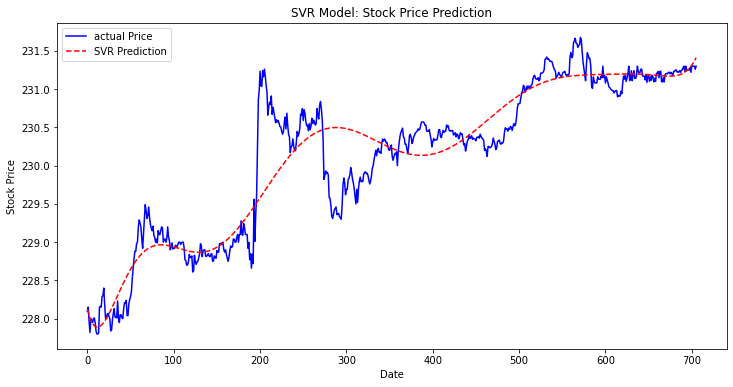

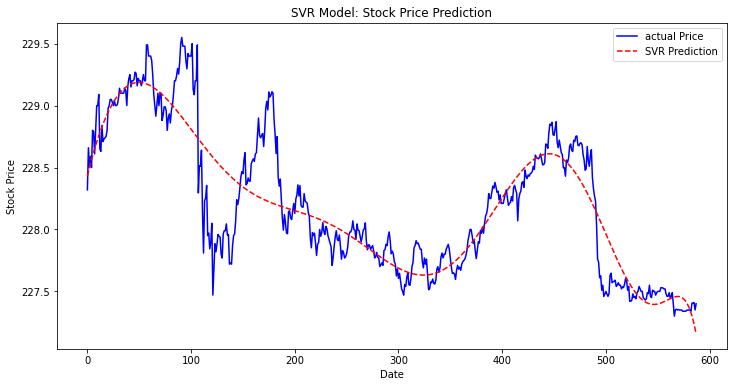

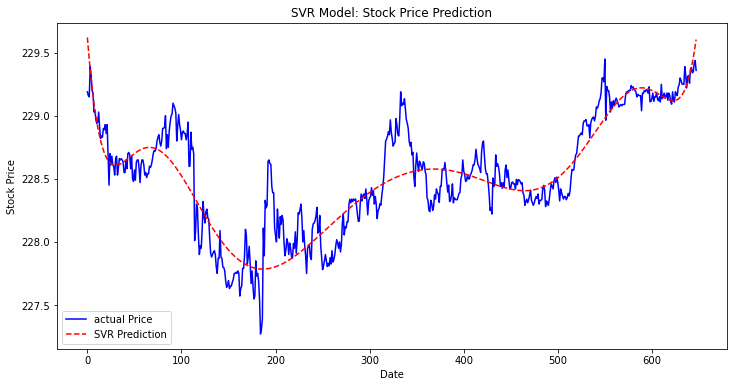

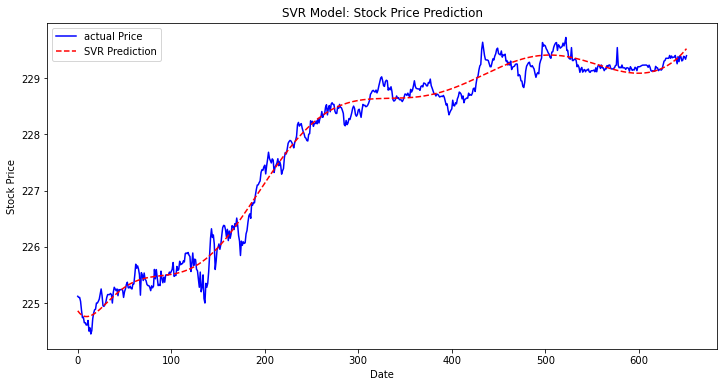

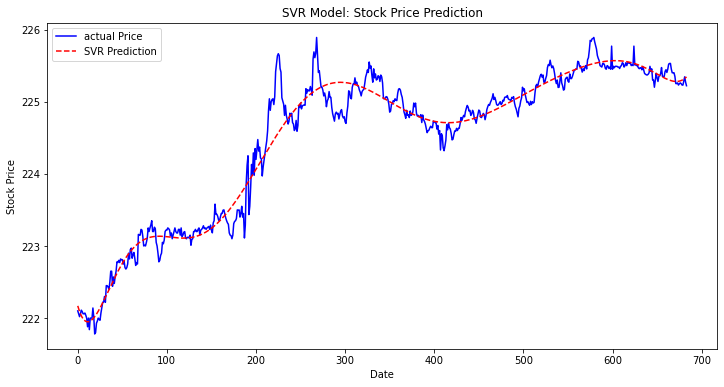

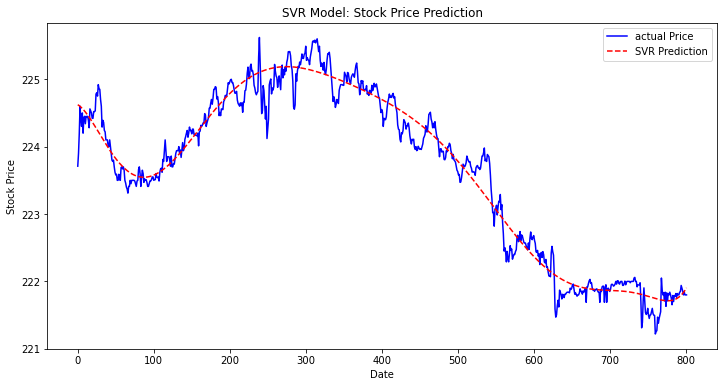

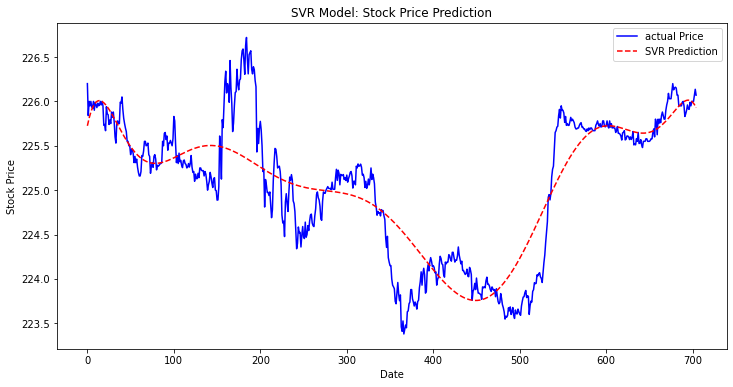

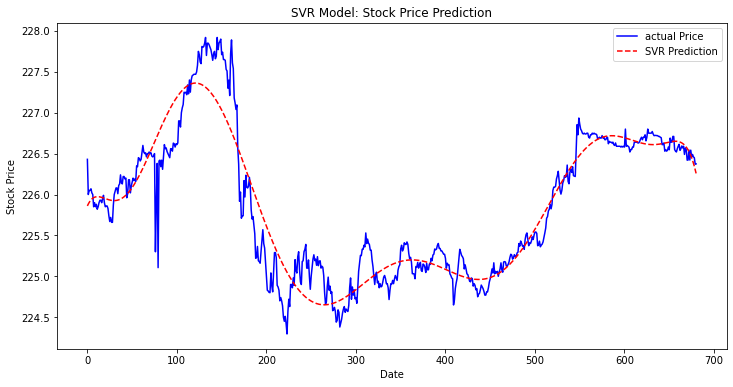

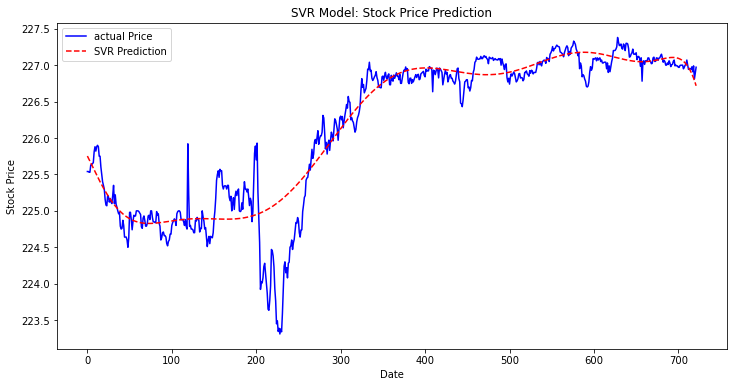

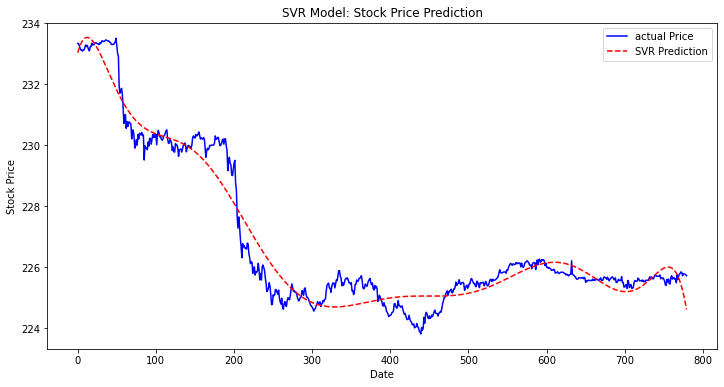

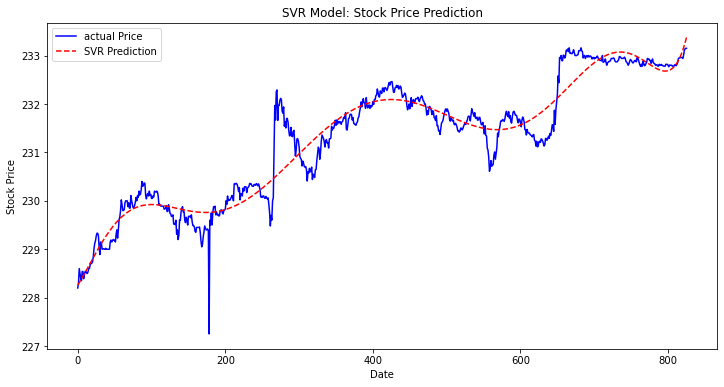

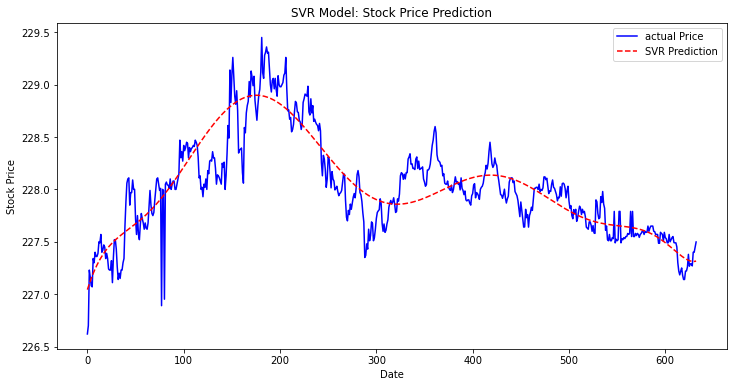

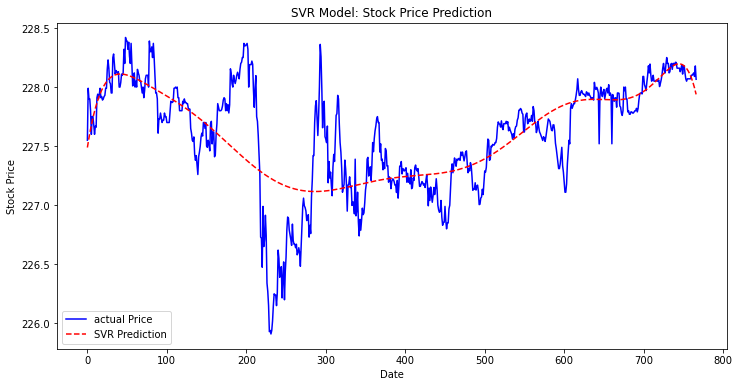

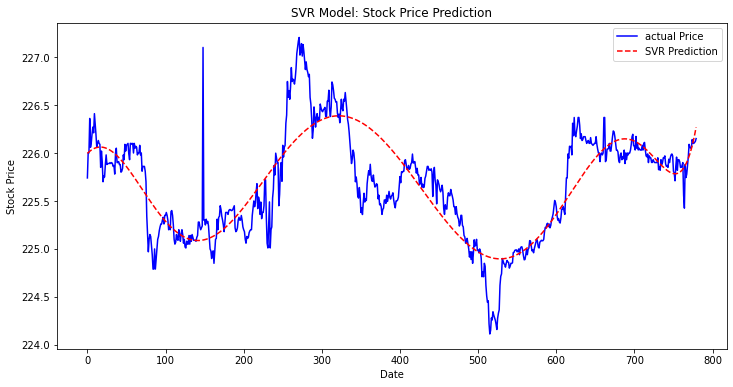

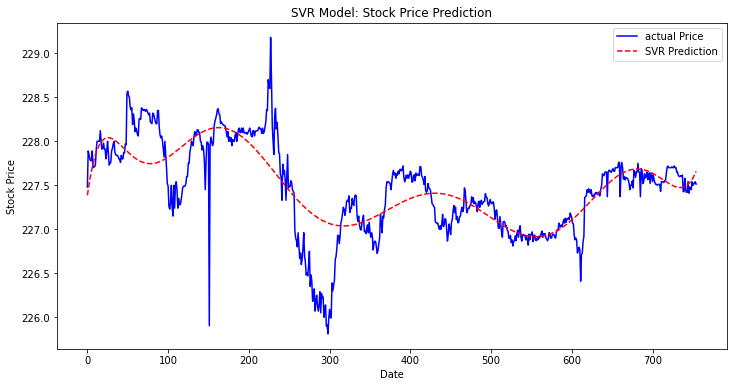

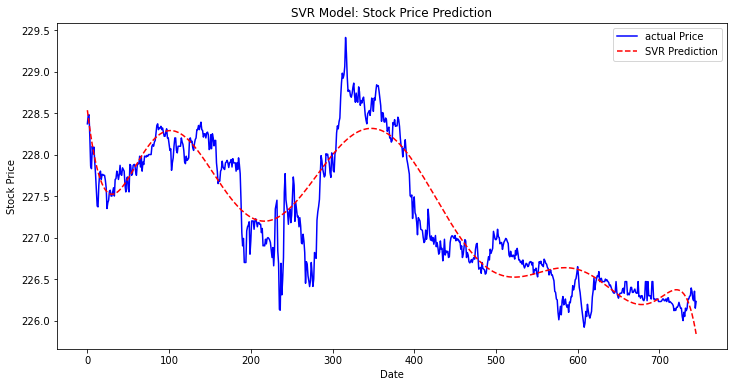

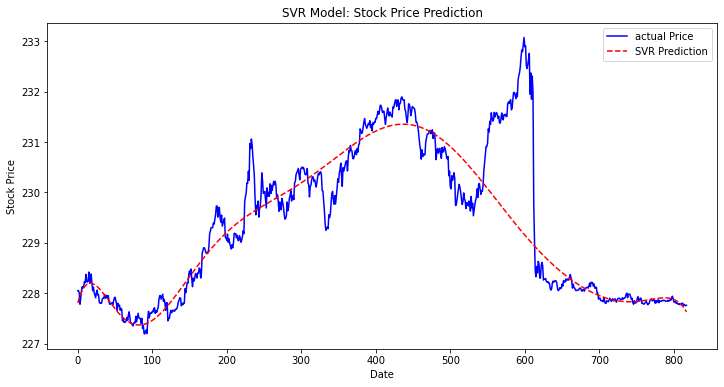

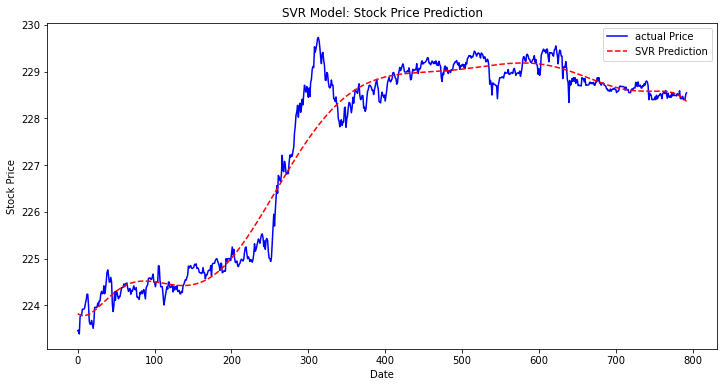

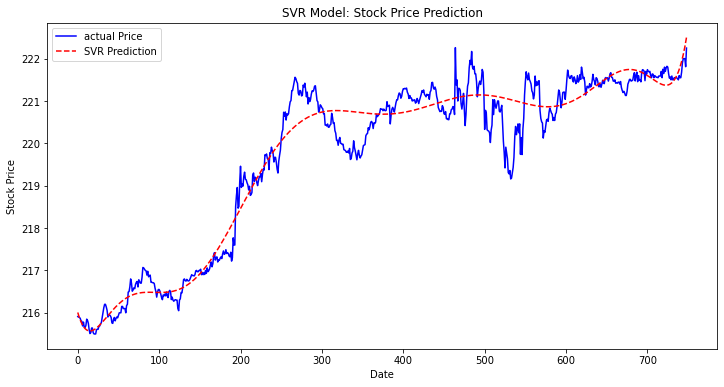

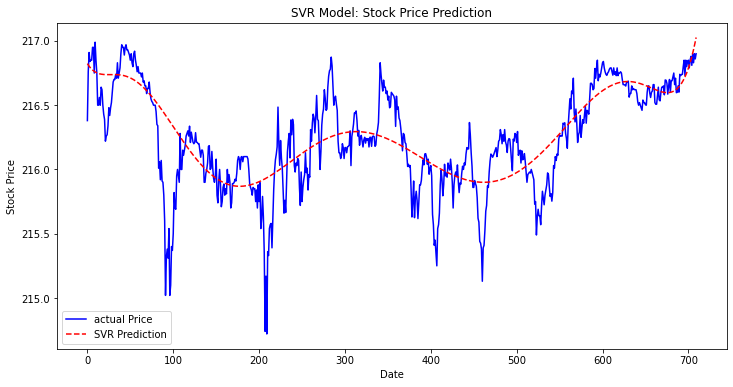

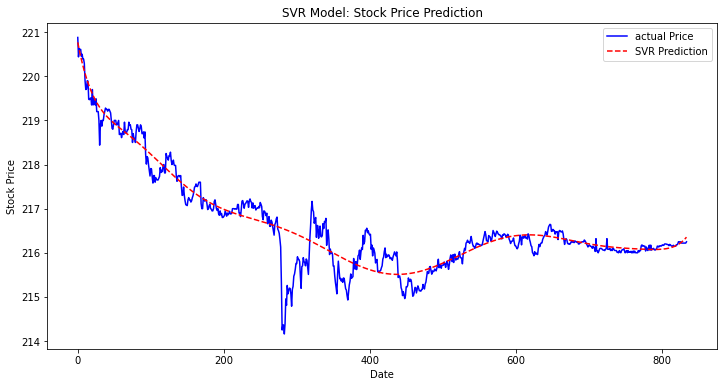

In [10]:
for df in dfs.values():
    df['time'] = pd.to_datetime(df['time'])
    df.sort_values('time', inplace=True)


    df['time'] = np.arange(len(df))
    X = df['time'].values.reshape(-1, 1)
    y = df['close'].values

    scaler_x = StandardScaler()
    scaler_y = StandardScaler()
    X_scaled = scaler_x.fit_transform(X)
    y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

    svr = SVR(kernel='poly', degree=10, C=1.0, epsilon=0.1, coef0=1)
    svr.fit(X_scaled, y_scaled)

    y_pred_scaled = svr.predict(X_scaled)
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

    plt.figure(figsize=(12, 6))
    plt.plot(df['time'], df['close'], label="actual Price", color="blue")
    plt.plot(df['time'], y_pred, label="SVR Prediction", color="red", linestyle="--")
    plt.xlabel("Date")
    plt.ylabel("Stock Price")
    plt.title("SVR Model: Stock Price Prediction")
    plt.legend()
    plt.show()
    

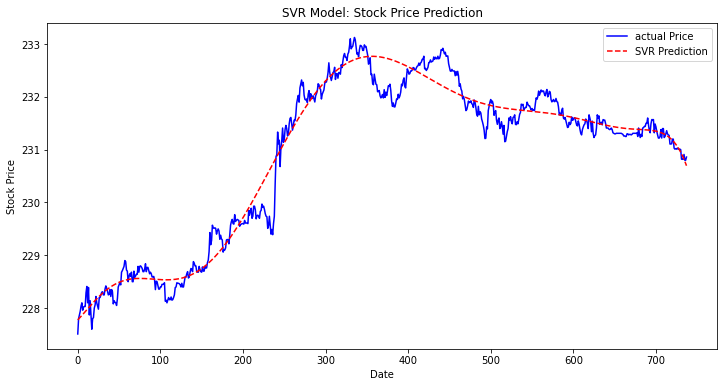

In [9]:





df['time'] = pd.to_datetime(df['time'])
df.sort_values('time', inplace=True)


df['time'] = np.arange(len(df))
X = df['time'].values.reshape(-1, 1)
y = df['close'].values

scaler_x = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_x.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

"""
for k in ['linear','poly','rbf','sigmoid']:
    svr = SVR(kernel=k, C=1e3, gamma=0.1)
    svr.fit(X_scaled, y_scaled)

    y_pred_scaled = svr.predict(X_scaled)
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

    plt.figure(figsize=(12, 6))
    plt.plot(df['time'], df['close'], label="actual Price", color="blue")
    plt.plot(df['time'], y_pred, label="SVR Prediction", color="red", linestyle="--")
    plt.xlabel("Date")
    plt.ylabel("Stock Price")
    plt.title("SVR Model: "+k+" kernel")
    plt.legend()
    plt.show()

    #confidence = clf.score(X_train, y_train)
    #print(k,confidence)
  """

svr = SVR(kernel='poly', degree=10, C=1.0, epsilon=0.1, coef0=1)
svr.fit(X_scaled, y_scaled)

y_pred_scaled = svr.predict(X_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['close'], label="actual Price", color="blue")
plt.plot(df['time'], y_pred, label="SVR Prediction", color="red", linestyle="--")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("SVR Model: Stock Price Prediction")
plt.legend()
plt.show()

#17

#time sequence regression possibly combining regession lines from different days